In [1]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dropout
from keras.layers import Dense

import math
from matplotlib.colors import ListedColormap

# visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.feature_selection import RFE


#cross-validation and plot ROC curves
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn import preprocessing

#NN
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score ,accuracy_score
from sklearn.preprocessing import label_binarize



ImportError: cannot import name 'to_categorical' from 'keras.utils' (C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\utils\__init__.py)

In [ ]:
ml_df = pd.read_csv(
    "../Dataset/dataset_filled_missing.csv")
ml_df.drop(["Unnamed: 0"], axis=1, inplace=True)
ml_df['Id'] = ['condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'control', 'control',
            'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control']
ml_df

,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,5days_sleep_time_activity,5days_day_time_activity,Id
0,2,37,2,2,2,8,1,2,19,10693.6,228824.0,condition
1,2,42,1,2,2,8,2,2,24,48771.2,239278.2,condition
2,1,47,2,2,2,8,2,2,24,43211.0,317726.0,condition
3,2,27,2,2,2,13,1,1,20,56892.4,194298.2,condition
4,2,52,2,2,2,13,2,2,26,31303.8,200302.2,condition
5,1,37,2,2,2,8,1,2,18,26634.2,240767.8,condition
6,1,22,1,2,2,13,2,1,24,61643.6,335598.2,condition
7,2,27,2,2,2,13,1,2,20,34374.2,284320.6,condition
8,2,47,1,2,2,8,1,2,26,42992.0,203120.0,condition
9,2,47,2,2,2,8,1,2,28,25811.0,482765.0,condition


In [ ]:
x = [] 
y = [] 
count  = 0
count_g = 0
count_o = 0

for i in range(len(ml_df["Id"])):
    
    if ml_df["Id"][i] == "condition":
        x.append(1)
        y.append([ml_df["5days_sleep_time_activity"][i],
                  ml_df["5days_day_time_activity"][i], ml_df["age"][i], ml_df["gender"][i], ml_df["afftype"][i], 
                  ml_df["melanch"][i], ml_df["inpatient"][i], ml_df["edu"][i], ml_df["work"][i], ml_df["madrs1"][i], ml_df["marriage"][i]])
                           
    
    elif ml_df["Id"][i] == "control":
        x.append(0)
        y.append([ml_df["5days_sleep_time_activity"][i],
                  ml_df["5days_day_time_activity"][i], ml_df["age"][i], ml_df["gender"][i], ml_df["afftype"][i],
                  ml_df["melanch"][i], ml_df["inpatient"][i], ml_df["edu"][i], ml_df["work"][i], ml_df["madrs1"][i], ml_df["marriage"][i]])
    

    
print(f'Select: {len(y)} set')
y = np.array(y)
x = np.array(x)

print(y)
print(x)


Select: 55 set
[[1.069360e+04 2.288240e+05 3.700000e+01 2.000000e+00 2.000000e+00
  2.000000e+00 2.000000e+00 8.000000e+00 2.000000e+00 1.900000e+01
  1.000000e+00]
 [4.877120e+04 2.392782e+05 4.200000e+01 2.000000e+00 1.000000e+00
  2.000000e+00 2.000000e+00 8.000000e+00 2.000000e+00 2.400000e+01
  2.000000e+00]
 [4.321100e+04 3.177260e+05 4.700000e+01 1.000000e+00 2.000000e+00
  2.000000e+00 2.000000e+00 8.000000e+00 2.000000e+00 2.400000e+01
  2.000000e+00]
 [5.689240e+04 1.942982e+05 2.700000e+01 2.000000e+00 2.000000e+00
  2.000000e+00 2.000000e+00 1.300000e+01 1.000000e+00 2.000000e+01
  1.000000e+00]
 [3.130380e+04 2.003022e+05 5.200000e+01 2.000000e+00 2.000000e+00
  2.000000e+00 2.000000e+00 1.300000e+01 2.000000e+00 2.600000e+01
  2.000000e+00]
 [2.663420e+04 2.407678e+05 3.700000e+01 1.000000e+00 2.000000e+00
  2.000000e+00 2.000000e+00 8.000000e+00 2.000000e+00 1.800000e+01
  1.000000e+00]
 [6.164360e+04 3.355982e+05 2.200000e+01 1.000000e+00 1.000000e+00
  2.000000e+00 2.0

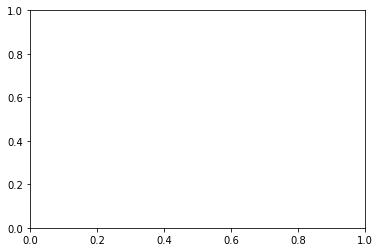

In [ ]:
# Add noisy features
random_state = np.random.RandomState(0)


# Train Test split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=random_state)


# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5, shuffle=True)


history = []

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()


In [ ]:
def classifier_modeling():

    model = Sequential()
    model.add(Dense(4, input_dim = 11, activation = 'relu'))
    model.add(Dense(2, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))

    model.compile(loss='binary_crossentropy',
                optimizer='adam', metrics=['accuracy'])
    model.fit(y_train, x_train, epochs=50, batch_size=10)
    return model

In [ ]:
classifier_modeling()

Epoch 1/50
5/5 [==============================] - 1s 1ms/step - loss: 75696.2812 - accuracy: 0.4545
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 73856.9062 - accuracy: 0.4545
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 72059.4453 - accuracy: 0.4545
Epoch 4/50
5/5 [==============================] - 0s 2ms/step - loss: 70406.8672 - accuracy: 0.4545
Epoch 5/50
5/5 [==============================] - 0s 2ms/step - loss: 68557.1172 - accuracy: 0.4545
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 66940.1797 - accuracy: 0.4545
Epoch 7/50
5/5 [==============================] - 0s 2ms/step - loss: 65244.7109 - accuracy: 0.4545
Epoch 8/50
5/5 [==============================] - 0s 2ms/step - loss: 63620.7148 - accuracy: 0.4545
Epoch 9/50
5/5 [==============================] - 0s 2ms/step - loss: 61966.1484 - accuracy: 0.4545
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 60456.5625 - accuracy: 0.4545

In [ ]:
_, accuracy = model.evaluate(y_test, x_test)
print('Accuracy: %.2f' % (accuracy*100))

1/1 [==============================] - 0s 209ms/step - loss: 15288.8848 - accuracy: 0.7273
Accuracy: 72.73


In [ ]:
predictions = model.predict(y)
rounded = [round(y[0]) for y in predictions]

Epoch 1/30
22/22 [==============================] - 0s 6ms/step - loss: 20154.1953 - accuracy: 0.5455 - val_loss: 13906.9756 - val_accuracy: 0.7273
Epoch 2/30
22/22 [==============================] - 0s 3ms/step - loss: 18361.1973 - accuracy: 0.5909 - val_loss: 12584.0713 - val_accuracy: 0.7273
Epoch 3/30
22/22 [==============================] - 0s 4ms/step - loss: 16661.1504 - accuracy: 0.5909 - val_loss: 11449.0635 - val_accuracy: 0.7273
Epoch 4/30
22/22 [==============================] - 0s 3ms/step - loss: 15164.6465 - accuracy: 0.5909 - val_loss: 10340.8389 - val_accuracy: 0.6364
Epoch 5/30
22/22 [==============================] - 0s 3ms/step - loss: 13681.4053 - accuracy: 0.5909 - val_loss: 9378.9893 - val_accuracy: 0.6364
Epoch 6/30
22/22 [==============================] - 0s 3ms/step - loss: 12363.4521 - accuracy: 0.5909 - val_loss: 8467.3447 - val_accuracy: 0.6364
Epoch 7/30
22/22 [==============================] - 0s 3ms/step - loss: 11182.9355 - accuracy: 0.5909 - val_loss: 

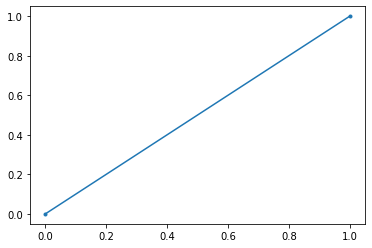

In [ ]:
from sklearn.metrics import roc_curve, auc

history = model.fit(y_train, x_train, validation_data=(
    y_test, x_test), epochs=30, batch_size=2, verbose=1)

x_pred = model.predict(y_test).ravel()

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(x_test, x_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.',
         label='Neural Network (auc = %0.3f)' % auc_keras)
from tensorflow import keras

Epoch 1/50
5/5 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.4545
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5455
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5455
Epoch 4/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5455
Epoch 5/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5455
Epoch 6/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5455
Epoch 7/50
5/5 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5455
Epoch 8/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5455
Epoch 9/50
5/5 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5455
Epoch 10/50
5/5 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5455
Epoch 11/50
5/5 [======================

ValueError: in user code:

    File "C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\engine\training.py", line 860, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\engine\training.py", line 918, in compute_loss
        return self.compiled_loss(
    File "C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\losses.py", line 1932, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\backend.py", line 5247, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)

    ValueError: `logits` and `labels` must have the same shape, received ((None, 1) vs (None, 2)).


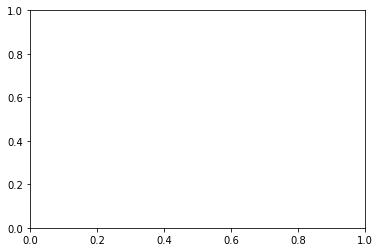

In [ ]:
kf = StratifiedKFold(n_splits = 5)
X_plot = y_train
y_plot = x_train

tprs = []
aucs = []
X_plot_train_list = []
y_plot_train_list = []

X_plot_val_list = []
y_plot_val_list = []

fig, ax = plt.subplots()
mean_fpr = np.linspace(0, 1, 100)
for i, (train, test) in enumerate(kf.split(X_plot, y_plot)):
    model = classifier_modeling()

    X_plot_train, X_val, y_plot_train, y_val = train_test_split(X_plot[train], y_plot[train], test_size=0.1, random_state=15, stratify=y_plot[train])


    le = preprocessing.LabelEncoder()
    le.fit(y_plot_train)
    y_plot_train = le.transform(y_plot_train)
    y_plot_test = le.transform(y_plot[test])
    y_val = le.transform(y_val)
    y_pot_train = keras.utils.to_categorical(y_plot_train)
    y_plot_test = keras.utils.to_categorical(y_plot_test)
    y_val = keras.utils.to_categorical(y_val)
    print("R : ", i + 1)
    model.fit(X_plot_train, y_plot_train, validation_data=(X_val, y_val), epochs=100, verbose=2)

    value = model.predict(X_plot[test])
    y_true = np.argmax(y_plot_test,axis=1)

    viz = RocCurveDisplay.from_predictions(y_true, value[:,1],name="ROC fold {}".format(i + 1),alpha=0.5,lw=1,ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    X_plot_train_list.append(X_plot_train)
    y_plot_train_list.append(y_plot_train)
    
    X_plot_val_list.append(X_val)
    y_plot_val_list.append(y_val)
    

    
ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", alpha=0.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color="b", label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc), lw=2, alpha=0.8,)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color="grey", alpha=0.2, label=r"$\pm$ 1 std. dev.",)

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], title="Receiver operating characteristic NN(elu)",)
ax.legend(loc="lower right")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 583.9760 - accuracy: 0.5455
Epoch 2/50
5/5 [==============================] - 0s 2ms/step - loss: 499.2799 - accuracy: 0.5455
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 426.6746 - accuracy: 0.5455
Epoch 4/50
5/5 [==============================] - 0s 2ms/step - loss: 350.0535 - accuracy: 0.5455
Epoch 5/50
5/5 [==============================] - 0s 2ms/step - loss: 285.7427 - accuracy: 0.5455
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 219.0531 - accuracy: 0.5455
Epoch 7/50
5/5 [==============================] - 0s 2ms/step - loss: 164.7598 - accuracy: 0.5455
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 108.9001 - accuracy: 0.5455
Epoch 9/50
5/5 [==============================] - 0s 1ms/step - loss: 66.7596 - accuracy: 0.5455
Epoch 10/50
5/5 [==============================] - 0s 2ms/step - loss: 21.6504 - accuracy: 0.5455
Epoch 11/50
5/5 [====

AttributeError: module 'tensorflow' has no attribute 'utils'

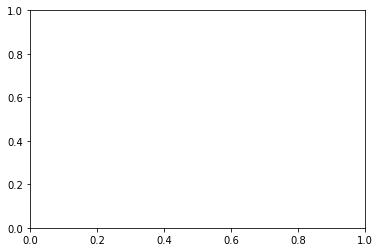

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True)
# Add noisy features
random_state = np.random.RandomState(0)


# # Train Test split
# x_train, x_test, y_train, y_test = train_test_split(
#     x, y, test_size=0.2, random_state=random_state)

x_plot = y_train
y_plot = x_train

tprs = []
aucs = []
x_plot_train_list = []
y_plot_train_list = []

x_plot_val_list = []
y_plot_val_train = []

fig, ax = plt.subplots()
mean_fpr = np.linspace(0, 1, 100)

for i, (train, test) in enumerate(cv.split(x_plot, y_plot)):
    model = classifier_modeling()

    x_plot_train, x_val, y_plot_train, y_val = train_test_split(
        x_plot[train], y_plot[train], test_size=0.1, random_state=15, stratify=y_plot[train])

    le = preprocessing.LabelEncoder()
    le.fit(y_plot_train)
    y_plot_train = le.transform(y_plot_train)
    y_plot_test = le.transform(y_plot[test])
    y_val = le.transform(y_val)
    y_plot_train = tf.utils.to_categorical(y_plot_train)
    y_plot_test = tf.utils.to_categorical(y_plot_test)
    y_val = tf.utils.to_categorical(y_val)
    print("R : ", i + 1)
    model.fit(x_plot_train, y_plot_train, validation_data=(x_val, y_val), epochs=50, batch_size=10)

    value = model.predict(x_plot[test])
    y_true = np.argmax(y_plot_test, axis=1)

    viz = RocCurveDisplay.from_predictions(y_true, value[:, 1], name="ROC fold {}".format(i + 1),
                                           alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    x_plot_train_list.append(x_plot.train)
    y_plot_train_list.append(y_plot.train)

    x_plot_val_list.append(x_val)
    y_plot_val_list.append(y_val)
